In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
class Neural_Network:
    def train(self,alpha=0.07,n_iter = 2000, lam = 0.15):
        self.alpha = alpha
        self.n_iter = n_iter
        self.lam = lam
        self.J_hist = []
        self.noi = []
    def sigmoid(self,x):
        return  1/(1+np.exp(-x))
    def fit(self,X,y,k,uni):
        m = X.shape[0]
        n = X.shape[1]
        X = self.normalize(X)
        self.w1 = np.random.randn(uni,n+1)
        self.w2 = np.random.randn(k,uni+1)
        Y_k = np.zeros((m,k))
        no = 0
        for i in range(m):
            Y_k[i,y[i]] = 1
        for j in range(self.n_iter):
             for i in range(m//50):
                delta1 =0
                delta2 =0
                grad1 =0
                grad2 =0
                a1 = X[i*50:i*50+50,:]
                yk = Y_k[i*50:i*50 + 50,:]
                a1 = a1.T
                yk = yk.T 
                z2 = self.w1@a1
                a2 = self.sigmoid(z2)
                a2 = np.vstack((np.ones((1,50)),a2))
                z3 = self.w2@a2
                a3 = self.sigmoid(z3)
                cost = np.sum(-1*(yk*np.log(a3) + (1-yk)*np.log(1-a3)))/50
                cost = cost + (self.lam/100)*(np.sum(self.w1[:,1:]**2) + np.sum(self.w2[:,1:]**2))
                
                no+=1
                self.J_hist.append(cost)
                self.noi.append(no)
                del3 = a3 - yk
                a2_ = self.sigmoid(z2)
                del2 = ((self.w2.T@del3)[1:,:])*(a2_*(1-a2_))
                delta2 = delta2 + (del3@a2.T)
                delta1 = delta1 + (del2@a1.T)  
                w1tem = self.w1
                w2tem = self.w2
                w1tem[:,0:1] = np.zeros((uni,1))
                w2tem[:,0:1] = np.zeros((k,1))
                grad2 = (delta2 + (self.lam*w2tem))/50
                grad1 = (delta1 + (self.lam*w1tem))/50
                self.w1 = self.w1 - self.alpha*grad1
                self.w2 = self.w2 - self.alpha*grad2
             if(j%50==0):
                 print(cost)         
   
    def predict(self,X):
       X = self.normalize(X)
       m = X.shape[0]
       X = X.T
       q = self.sigmoid(self.w1@X)
       q = np.vstack((np.ones((1,m)),q))
       y_pred = self.sigmoid(self.w2@q)
       y_pred = y_pred.argmax(axis =0)
       return y_pred
    def accuracy(self,y_pred,y_test):
       m = len(y_pred)
       sum1=0
       for i in range(m):
           if(y_pred[i]==y_test[i]):
               sum1+=1
       return (sum1/m)*100    
    def plot_learn(self):
      plt.plot(self.noi,self.J_hist)
      plt.xlabel("Number Of Iterations")
      plt.ylabel("Cost Function")
      plt.title("Cost Function vs Iteration")
      
    def normalize(self,X):
        m = X.shape[0]
        for i in range(X.shape[1]):
            X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.std(X[:,i]) + np.exp(-9))
        X = np.hstack((np.ones((m, 1)), X))
        return X
  
      
         
        
         
   

In [0]:
df = pd.read_csv('sample_data/mnist_train_small.csv',header = None)

In [0]:
X_train = np.array(df.iloc[:,1:785])
y_train = np.array(df.iloc[:,0])

In [0]:
a = Neural_Network()
a.train()

In [0]:
a.fit(X_train,y_train,10,40)

42.788670691227004
1.1440821920870874
1.1003700143153667
1.0867284084338453
1.0831078602581612
1.0848123834335381
1.085171483793224
1.0849233227956012
1.0843895362869955
1.0833108995906546
1.080625652233004
1.0776893632100997
1.0765222072740708
1.0772630632857854
1.074810532386222
1.0741099501063778
1.0752160048488624
1.076158152313827
1.077241402128593
1.0786916593800646
1.079945645689241
1.0809920319013488
1.0824469178209377
1.0834563513994222
1.0839043532570822
1.0841762007552114
1.0843598161858732
1.0844794191194809
1.0845974019697746
1.084740198776967
1.0849132750167128
1.085176643520095
1.0854337099779627
1.0856580031689262
1.0862721183222956
1.0864924199116224
1.0865480987576883
1.0866263419083284
1.0866989644302736
1.0867511025880123


In [0]:
y_pred = a.predict(X_train)

In [0]:
a.accuracy(y_pred,y_train)

93.84

In [0]:
df1 = pd.read_csv('sample_data/mnist_test.csv',header = None)
X_test = np.array(df1.iloc[:,1:785])
y_test = np.array(df1.iloc[:,0])

In [0]:
y_pred = a.predict(X_test)

In [0]:
a.accuracy(y_pred,y_test)

91.97999999999999

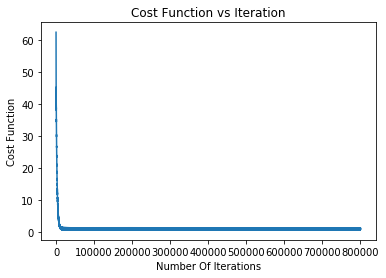

In [0]:
a.plot_learn()